In [3]:
# Import packages we'll need later on in this tutorial
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json

# Import BW25 packages. You'll notice the packages are imported individually, unlike a one-and-done import with BW2.
import bw2data as bd
import bw2io as bi
import bw2calc as bc
import bw2analyzer as bwa

/var/folders/x9/qx5c348j7kb51ml67rz403h80000gn/T/ipykernel_6009/2705203230.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
# If you're just starting out, this should only have "default" in it.
# Else, you'll see all the previous projects you've worked on.
# You need to set a project. Give it a name!
name = "bw25-tuto"
bd.projects.set_current(name)
bd.projects

Brightway2 projects manager with 2 objects:
	bw25-tuto
	default
Use `projects.report()` to get a report on all projects.

In [5]:
bd.projects.dir

PosixPath('/Users/tanngyuenle/Library/Application Support/Brightway3/bw25-tuto.45033c72')

In [6]:
# Import the path where your EI database is stored. 
# Note that the EI database must be unzipped and the path should end at the datasets folder.
ei_path = "~/Projects/fastApiProject/ecoinvent_3.9.1_cutoff/datasets"

# You will also need to give your database a name. This name will appear when you call bd.databases.
# Here, I am using EI v3.9.1 cutoff.
ei_name = "ecoinvent-391-cutoff"

In [7]:
# When we execute this cell, we will check if it's already been imported, and if not (else) we import it.
if ei_name in bd.databases:
  print("Database has already been imported.")
else:
  # Go ahead and import:
  ei_importer = bi.SingleOutputEcospold2Importer(ei_path, ei_name)
  # Apply strategies 
  ei_importer.apply_strategies()
  # We can get some statistics
  ei_importer.statistics()
  # Now we will write the database into our project. 
  ei_importer.write_database()

Database has already been imported.


In [8]:
# If this is your first time using this BW25 project, this should be an empty dictionary! 
bd.databases

Databases dictionary with 3 object(s):
	biosphere3
	ecoinvent-310-cutoff
	ecoinvent-391-cutoff

In [9]:
# If this is the first time you've set up the project, you need to install the biosphere flows.
# You do not need to run this subsequent times.

#bi.bw2setup()  ## THIS YIELDS AN ERROR AT THE MOMENT

In [10]:
eidb = bd.Database(ei_name)
print("The imported ecoinvent database is of type {} and has a length of {}.".format(type(eidb), len(eidb)))


The imported ecoinvent database is of type <class 'bw2data.backends.base.SQLiteBackend'> and has a length of 21239.


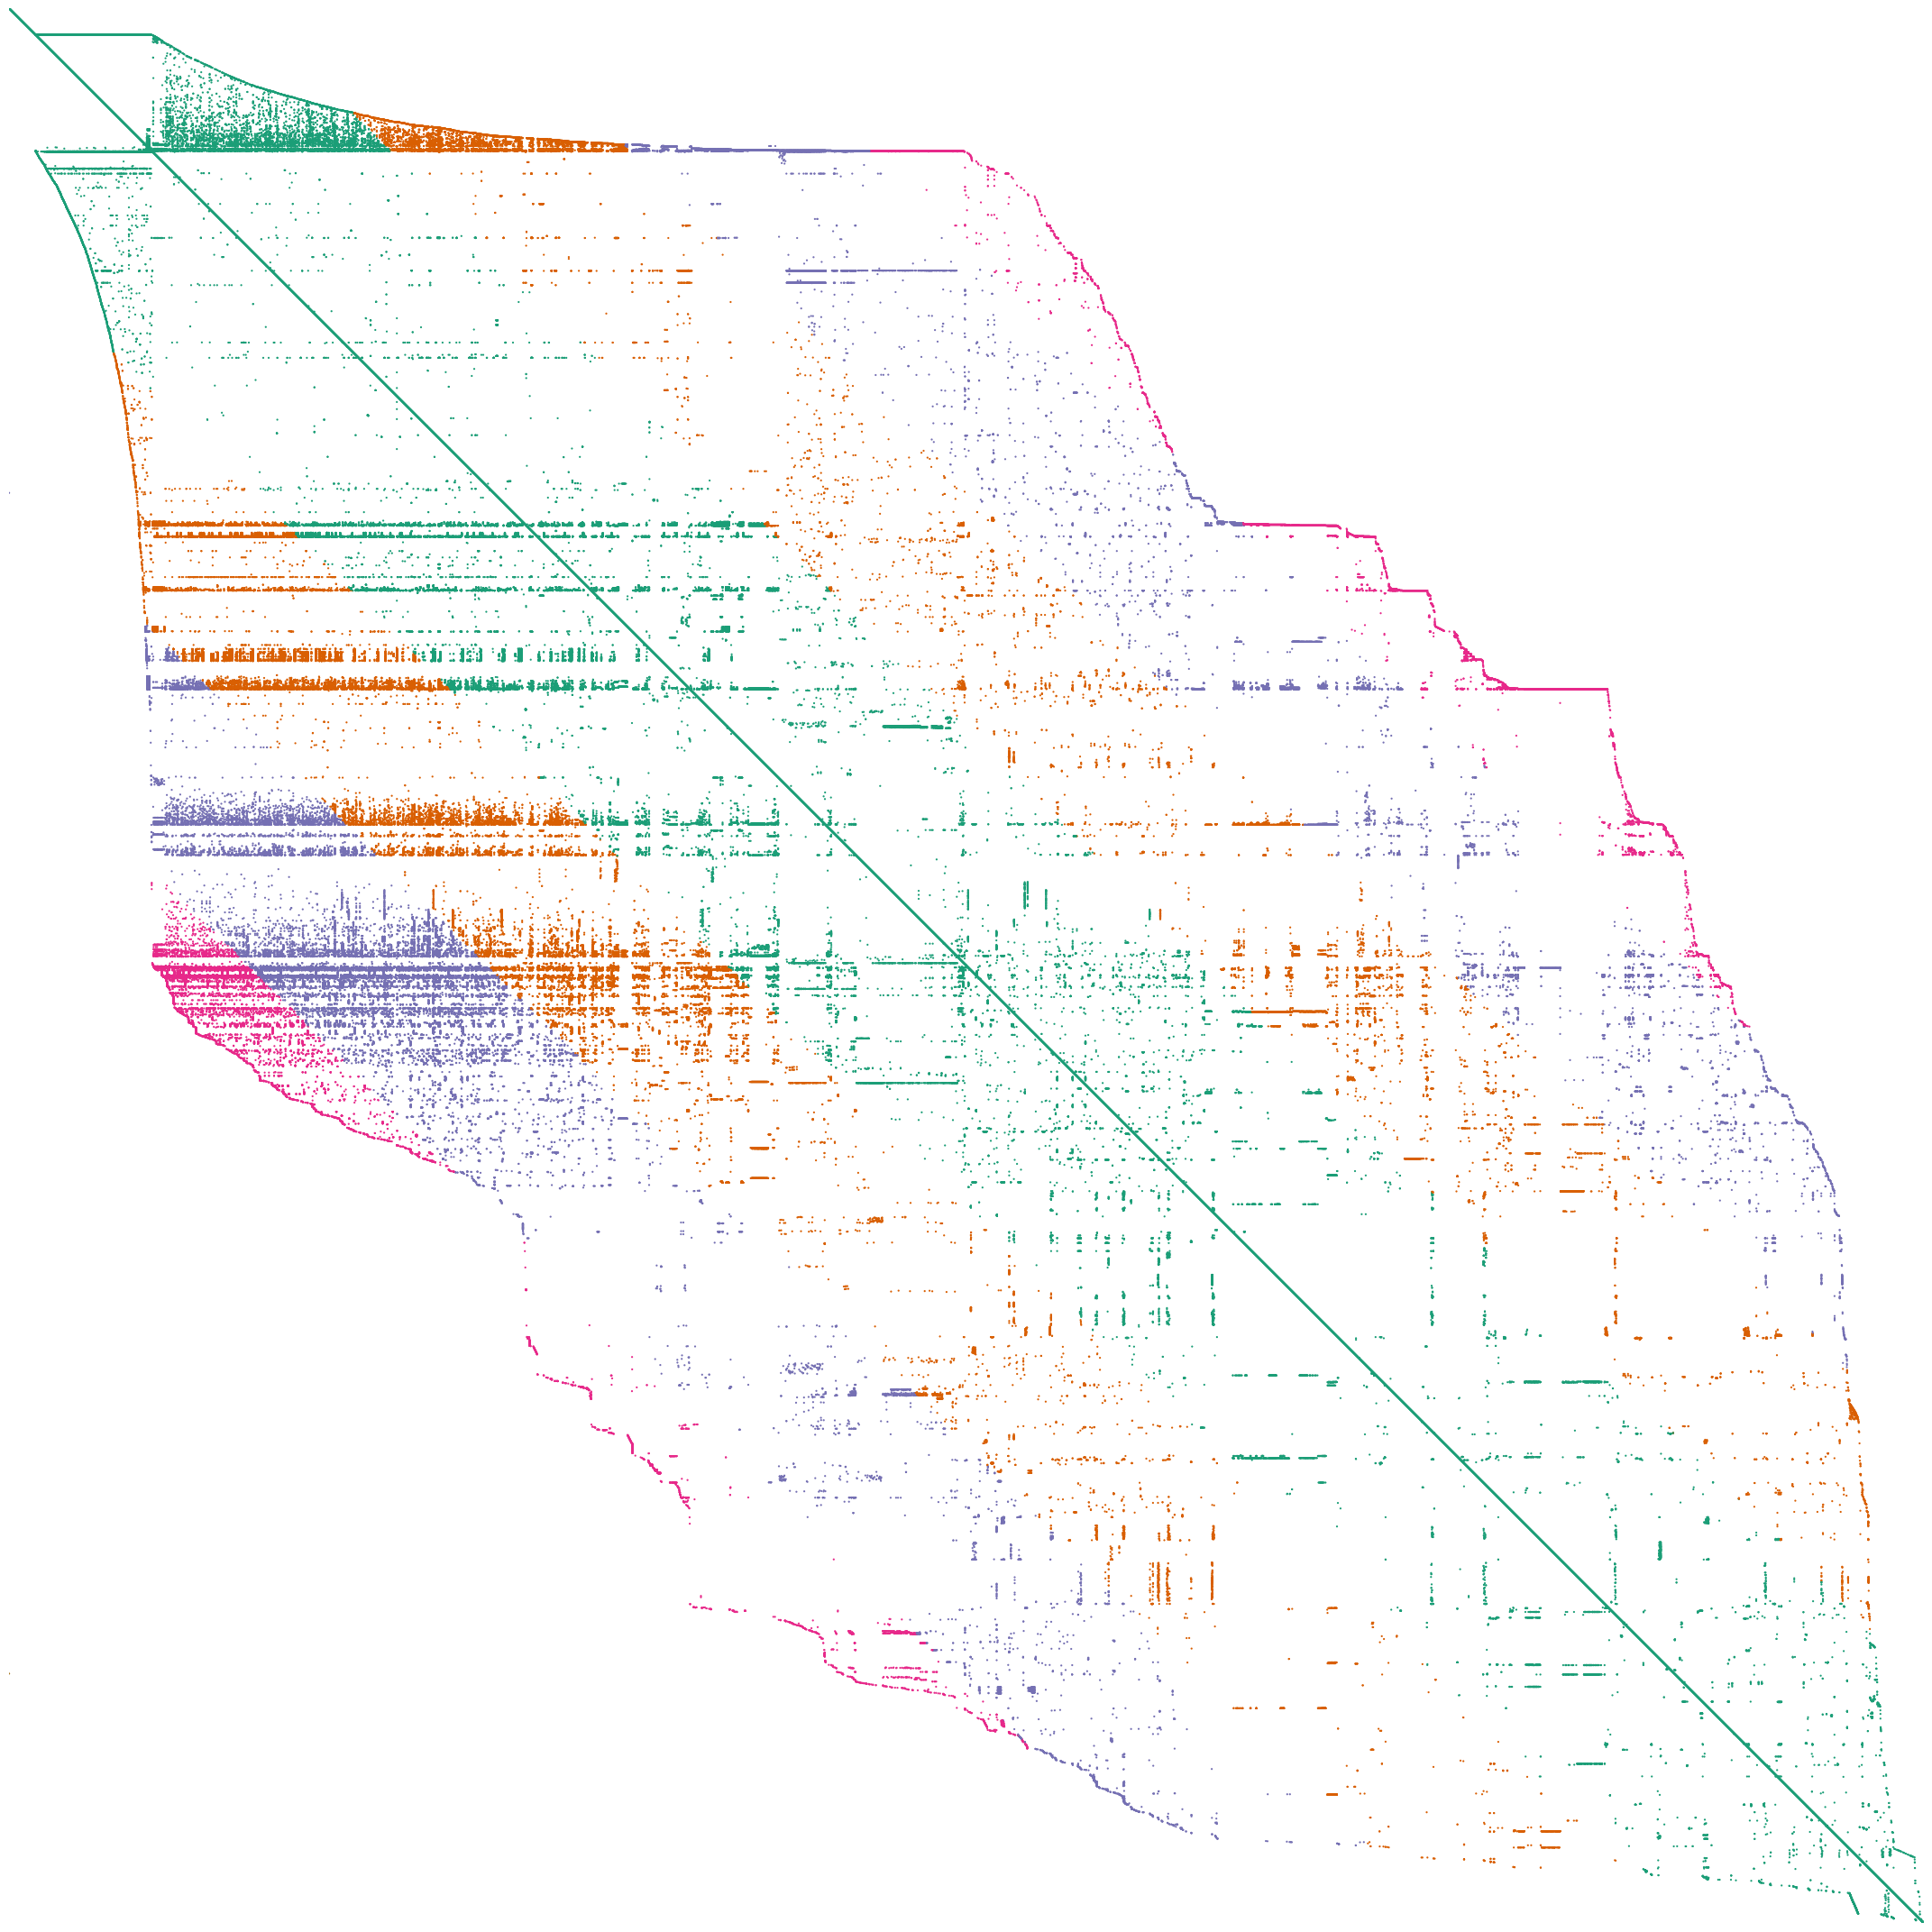

In [11]:
# Be patient, this can take a couple seconds ;)
eidb.graph_technosphere()

In [12]:
eidb.search('building construction, Switzerland')
#this search, however, does yield the complete list
for act in [act for act in eidb if 'building construction' in act['name']]:
    print(json.dumps(act.as_dict(), indent=2))

{
  "comment": "The module is based on a fictitious building hall with size: length 50 m, width 30 m, height 7 m, daylight opening 110 m2. The service life is assumed to be 50 years. This module should not be used if its relative importance would be high in a certain environmental inventory.\n[This dataset was already contained in the ecoinvent database version 2. It was not individually updated during the transfer to ecoinvent version 3. Life Cycle Impact Assessment results may still have changed, as they are affected by changes in the supply chain, i.e. in other datasets. This dataset was generated following the ecoinvent quality guidelines for version 2. It may have been subject to central changes described in the ecoinvent version 3 change report (http://www.ecoinvent.org/database/ecoinvent-version-3/reports-of-changes/), and the results of the central updates were reviewed extensively. The changes added e.g. consistent water flows and other information throughout the database. The

In [13]:
random_act = eidb.random()
random_act.as_dict()

{'comment': 'This dataset represents the impacts associated to 1 ha of land use change (LUC), split between change from annual cropland, perennial cropland, primary forest, secondary forest and grassland. This dataset is specific to the country and to perennial cropland.\nThe dataset further includes the (management practice specific) occupation impacts, i.e. the loss of soil organic carbon (SOC), methane (CH4), nitrous oxide (N2O) and, when relevant, peat oxidation.',
 'classifications': [('ISIC rev.4 ecoinvent',
   '0161:Support activities for crop production'),
  ('CPC',
   '7: Financial and related services; real estate services; and rental and leasing services')],
 'activity type': 'ordinary transforming activity',
 'activity': 'e1ab7c12-01d9-5c26-af1c-df5f3f613a08',
 'database': 'ecoinvent-391-cutoff',
 'filename': 'e1ab7c12-01d9-5c26-af1c-df5f3f613a08_f372d4c2-7310-4fb9-8bb6-bee214fd08d1.spold',
 'location': 'GH',
 'name': 'land use change, perennial crop',
 'synonyms': [],
 'pa

In [14]:
for exc in random_act.exchanges():
  print(exc)

Exchange: 1.0 hectare 'land use change, perennial crop' (hectare, GH, None) to 'land use change, perennial crop' (hectare, GH, None)>
Exchange: 516.754 kilogram 'market for land tenure, arable land, measured as carbon net primary productivity, perennial crop' (kilogram, GH, None) to 'land use change, perennial crop' (hectare, GH, None)>
Exchange: 15.7872 kilogram 'Carbon dioxide, from soil or biomass stock' (kilogram, None, ('air', 'non-urban air or from high stacks')) to 'land use change, perennial crop' (hectare, GH, None)>
Exchange: 0.007294 kilogram 'Dinitrogen monoxide' (kilogram, None, ('air', 'non-urban air or from high stacks')) to 'land use change, perennial crop' (hectare, GH, None)>
Exchange: 0.048308 kilogram 'Methane, non-fossil' (kilogram, None, ('air', 'non-urban air or from high stacks')) to 'land use change, perennial crop' (hectare, GH, None)>
Exchange: 4.342 kilogram 'Carbon, organic, in soil or biomass stock' (kilogram, None, ('natural resource', 'in ground')) to 'l

In [15]:
#change the numeral to check out the other exchanges (as from the list above)
[exc for exc in random_act.exchanges()][0].as_dict()

{'flow': 'f372d4c2-7310-4fb9-8bb6-bee214fd08d1',
 'type': 'production',
 'name': 'land use change, perennial crop',
 'classifications': {'CPC': ['7: Financial and related services; real estate services; and rental and leasing services']},
 'production volume': 9954.11825675,
 'properties': {'carbon allocation': {'amount': 0.0, 'unit': 'kg'},
  'carbon content': {'amount': 0.0, 'unit': 'dimensionless'},
  'price': {'amount': 0.0,
   'unit': 'EUR2005',
   'comment': 'No price assigned.'}},
 'activity': 'e1ab7c12-01d9-5c26-af1c-df5f3f613a08',
 'unit': 'hectare',
 'comment': 'Yield = 1.0 kg/haActivities related land use change of perennial crops, including clear-cutting (of grassland, primary forest and secondary forest), land already in use and emissions due to soil occupation',
 'amount': 1.0,
 'uncertainty type': 0,
 'loc': 1.0,
 'input': ('ecoinvent-391-cutoff', '5f1acf3cc6ec24a42de3577404dcf039'),
 'output': ('ecoinvent-391-cutoff', '5f1acf3cc6ec24a42de3577404dcf039')}

In [16]:
#getting an activity's code
random_act['code']

'5f1acf3cc6ec24a42de3577404dcf039'

In [17]:
#getting an activity's name through its code
eidb.get(random_act['code'])

'land use change, perennial crop' (hectare, GH, None)

In [18]:
#getting an activity's key
random_act.key

('ecoinvent-391-cutoff', '5f1acf3cc6ec24a42de3577404dcf039')

In [19]:
#getting an activity's name using its key
bd.get_activity(random_act.key)

'land use change, perennial crop' (hectare, GH, None)

In [20]:
eidb.search('electricity, low voltage')

['market for electricity, low voltage' (kilowatt hour, BR-Southern grid, None),
 'market for electricity, low voltage' (kilowatt hour, BR-Northern grid, None),
 'market for electricity, low voltage' (kilowatt hour, BR-South-eastern/Mid-western grid, None),
 'electricity voltage transformation from medium to low voltage' (kilowatt hour, BR-Northern grid, None),
 'electricity voltage transformation from medium to low voltage' (kilowatt hour, CN-SWG, None),
 'electricity voltage transformation from medium to low voltage' (kilowatt hour, CN-NECG, None),
 'electricity voltage transformation from medium to low voltage' (kilowatt hour, CN-ECGC, None),
 'electricity voltage transformation from medium to low voltage' (kilowatt hour, CN-NWG, None),
 'electricity, low voltage, residual mix' (kilowatt hour, CZ, None),
 'electricity, low voltage, residual mix' (kilowatt hour, ME, None),
 'electricity, low voltage, residual mix' (kilowatt hour, NO, None),
 'electricity, low voltage, residual mix' (k

In [21]:
#this search, however, does yield the complete list
for act in [act for act in eidb if 'electricity, low voltage' in act['name']]:
    print(act)

'market group for electricity, low voltage' (kilowatt hour, RAF, None)
'market for electricity, low voltage' (kilowatt hour, US-SERC, None)
'market for electricity, low voltage' (kilowatt hour, SV, None)
'market for electricity, low voltage' (kilowatt hour, CO, None)
'market group for electricity, low voltage' (kilowatt hour, BR, None)
'market for electricity, low voltage' (kilowatt hour, US-ASCC, None)
'market for electricity, low voltage' (kilowatt hour, RU, None)
'market for electricity, low voltage' (kilowatt hour, CN-NECG, None)
'market for electricity, low voltage' (kilowatt hour, PH, None)
'market for electricity, low voltage' (kilowatt hour, JP, None)
'market for electricity, low voltage' (kilowatt hour, TZ, None)
'market for electricity, low voltage' (kilowatt hour, GA, None)
'market for electricity, low voltage' (kilowatt hour, IN-Southern grid, None)
'distribution network construction, electricity, low voltage' (kilometer, RoW, None)
'market for electricity, low voltage' (ki

In [22]:
process = [act for act in eidb if 'electricity, low voltage' in act['name'] and 'CA-ON' in act['location']][0]
process

'market for electricity, low voltage' (kilowatt hour, CA-ON, None)

In [23]:
process.as_dict()

{'comment': "This is a market activity. Each market represents the consumption mix of a product in a given geography, connecting suppliers with consumers of the same product in the same geographical area. Markets group the producers and also the imports of the product (if relevant) within the same geographical area. They also account for transport to the consumer and for the losses during that process, when relevant.\nThis dataset describes the electricity available on the high voltage level in Canada, Ontario. This is done by showing the transmission of 1kWh electricity at high voltage.\nTechnology:  Adaptation from global aluminum industry data. It will be considered in uncertainty\nTime period:  The 'Start of Period' and 'End of Period' do not refer to the year for which this market is valid. See general comment for the year for which the shares are based on.",
 'classifications': [('ISIC rev.4 ecoinvent',
   '3510:Electric power generation, transmission and distribution'),
  ('EcoS

In [24]:
eidb.get('429ee8a600b97b759e5a0e9b45d4642f')

'zinc coating, pieces' (square meter, RER, None)

In [25]:

waste_handling = eidb.new_activity(code = 'test1', name = "Waste handling", unit = "unit")
waste_handling.save()

DuplicateNode: Node with this database / code combo already exists

In [ ]:
from bw2data import parameters

project_data = [{
    'name': 'M',
    'amount': 0.06,
}, {
    'name': 'D',
    'amount': 200
}]

parameters.new_project_parameters(project_data)

In [ ]:
from bw2data.parameters import ProjectParameter

# have a look at existing project parameters
for param in ProjectParameter.select():
    print(param, param.amount)

In [ ]:
aluminium = [act for act in eidb if act['name']=='treatment of aluminium scrap, post-consumer, prepared for recycling, at refiner' and 'RER' in act['location']][0]
waste_handling.new_exchange(input=aluminium.key,amount=0,unit="kilogram",type='technosphere', formula='M').save()
waste_handling.save()

transport = [act for act in eidb if act['name']=='market for transport, freight, lorry 3.5-7.5 metric ton, EURO5' and 'RoW' in act['location']][0]
waste_handling.new_exchange(input=transport.key,amount=0,unit="ton kilometer",type='technosphere', formula='D*M/1000').save()
waste_handling.save()

air = [act for act in eidb if act['name']=='market for compressed air, 600 kPa gauge' and 'GLO' in act['location']][0]
waste_handling.new_exchange(input=air.key,amount=0,unit="cubic meter",type='technosphere', formula='D*M/1000').save()
waste_handling.save()